<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Initialize-Random-Number-Generator" data-toc-modified-id="Initialize-Random-Number-Generator-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialize Random Number Generator</a></span></li><li><span><a href="#Load-the-Dataset" data-toc-modified-id="Load-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load the Dataset</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prepare the data</a></span></li></ul></li><li><span><a href="#Neural-Network-Model" data-toc-modified-id="Neural-Network-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Network Model</a></span></li><li><span><a href="#XGBOOST" data-toc-modified-id="XGBOOST-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>XGBOOST</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#XGBOOST-extended" data-toc-modified-id="XGBOOST-extended-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>XGBOOST extended</a></span><ul class="toc-item"><li><span><a href="#Split-data-into-training-and-validation-sets" data-toc-modified-id="Split-data-into-training-and-validation-sets-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Split data into training and validation sets</a></span></li><li><span><a href="#Fit-model-on-training-data" data-toc-modified-id="Fit-model-on-training-data-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Fit model on training data</a></span></li><li><span><a href="#Make-predictions-for-validation-data" data-toc-modified-id="Make-predictions-for-validation-data-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Make predictions for validation data</a></span></li><li><span><a href="#evaluate-predictions" data-toc-modified-id="evaluate-predictions-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>evaluate predictions</a></span></li></ul></li><li><span><a href="#Monitoring-performance-and-Early-Stopping" data-toc-modified-id="Monitoring-performance-and-Early-Stopping-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Monitoring performance and Early Stopping</a></span></li></ul></li></ul></div>

# Initialize Random Number Generator

In [1]:
import numpy as np

In [2]:
seed = 4242
np.random.seed(seed)

# Load the Dataset

In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('../post-data/train.csv').drop(columns=['Unnamed: 0'])
train_data.head()

,camera,fname,a0,a1,a2,s0,s1,s2
0,HTC-1-M7,(HTC-1-M7)1.jpg,118.223227,115.003896,111.967798,57.210818,54.533104,64.853878
1,HTC-1-M7,(HTC-1-M7)10.jpg,128.141141,122.825341,107.254211,56.619943,55.002498,59.375556
2,HTC-1-M7,(HTC-1-M7)100.jpg,98.610660,89.714463,82.452863,68.868366,73.298074,73.463918
3,HTC-1-M7,(HTC-1-M7)101.jpg,109.477162,104.011235,102.435257,46.961676,50.286467,54.133753
4,HTC-1-M7,(HTC-1-M7)102.jpg,105.730427,70.830199,103.631270,17.310780,18.811962,15.008880


In [5]:
test_data = pd.read_csv('../post-data/test.csv').drop(columns=['Unnamed: 0'])
test_data.head()

,fname,a0,a1,a2,s0,s1,s2
0,img_0002a04_manip.tif,187.380531,181.926029,173.161304,34.441726,34.237523,28.067430
1,img_001e31c_unalt.tif,171.232990,140.817070,121.201546,66.119656,69.017232,71.617331
2,img_00275cf_manip.tif,86.310349,85.689690,79.065269,52.221585,54.244189,53.314759
3,img_0034113_unalt.tif,152.006332,140.768970,132.285995,70.564771,65.590737,58.753384
4,img_00344b7_unalt.tif,95.538319,100.303024,92.712677,70.115464,65.860571,64.039072


In [6]:
cols = ['a0', 'a1', 'a2', 's0', 's1', 's2']


In [7]:
X_train = train_data[cols].values
X_test = test_data[cols].values
print(X_train.shape)
print(X_test.shape)

(2750, 6)
(2640, 6)


In [8]:
train_labels = train_data['camera'].values
train_labels

array(['HTC-1-M7', 'HTC-1-M7', 'HTC-1-M7', ..., 'Motorola-X', 'Motorola-X',
       'Motorola-X'], dtype=object)

In [9]:
train_labels.shape

(2750,)

## Prepare the data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.utils import np_utils

Using TensorFlow backend.


In [11]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_labels)
encoded_Y = encoder.transform(train_labels)

In [12]:
encoded_Y[:4]

array([0, 0, 0, 0])

In [13]:
# convert integers to dummy variables (i.e one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)

In [14]:
x_train, y_train = shuffle(X_train, encoded_Y, random_state=seed)

In [15]:
x_train[:5]

array([[  58.84471296,   49.93487104,   38.90922862,   42.87861481,
          40.24568119,   37.57830517],
       [ 114.54920658,  129.65230923,  129.65298077,   66.03141506,
          63.74333362,   81.53580846],
       [ 116.17599433,  128.95713377,  142.21829793,   59.62550104,
          61.02571382,   72.62387086],
       [ 140.24306599,  143.70790006,  144.47462227,   64.46722264,
          63.8214634 ,   69.86607987],
       [ 109.5898624 ,  117.45532843,  108.18150496,   66.5807312 ,
          60.25748265,   66.96279974]])

In [16]:
y_train[:5]

array([7, 4, 1, 5, 8])

In [17]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42)

# Neural Network Model

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [19]:
#clf = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=32, verbose=0)

In [20]:
#clf.fit(x_train, y_train, )

In [21]:
#kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [22]:
#results = cross_val_score(clf, x_train, y_train, cv=kfold)

In [23]:
#results

In [24]:
#preds = clf.predict(X_test)

In [25]:
#preds[1]

In [26]:
#predictions = [encoder.inverse_transform(pred) for pred in preds]

In [27]:
#predictions

# XGBOOST

The most important XGBoost parameters are as follows:

- ```eta (default=0.3)```: This is the equivalent of the learning rate in Scikit-learn's GBM
- ```min_child_weight (default=1)```: Higher values prevent overfitting and tree complexity
- ```max_depth (default=6)```: This is the number of interactions in the trees
- ```subsample (default=1)```: This is a fraction of samples of the training data that we take in each iteration
- ```colsample_bytree (default=1)```: This is the fraction of features in each iteration
- ```lambda (default=1)```: This is the L2 regularization (Boolean)
- ```seed (default=0)```: This is the equivalent of Scikit-learn's random_state parameter, allowing reproducibility of learning processes across multiple tests and different machines



![](subm1.png)

## Monitoring performance and Early Stopping

In [28]:
import xgboost as xgb

In [45]:
params = {}
params['objective'] = 'multi:softmax'
params['eval_metric'] = 'mlogloss'
params['num_class'] = 10
params['tree_method'] = 'exact'
params['silent'] = 0
params['max_bin'] = 12
params['eta'] = 0.1
params['max_depth'] = 6
params['subsample'] = 0.5

In [46]:
d_train = xgb.DMatrix(X_train, label=Y_train)
d_valid = xgb.DMatrix(X_valid, label=Y_valid)
watchlist = [(d_valid,'eval'),(d_train,'train')]

In [31]:
clf = xgb.train(params, d_train, 200, watchlist, early_stopping_rounds=50, verbose_eval=True)

[0]	eval-mlogloss:2.30257	train-mlogloss:2.25779
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 50 rounds.
[1]	eval-mlogloss:2.30357	train-mlogloss:2.21177
[2]	eval-mlogloss:2.30613	train-mlogloss:2.17443
[3]	eval-mlogloss:2.30981	train-mlogloss:2.13706
[4]	eval-mlogloss:2.31731	train-mlogloss:2.09706
[5]	eval-mlogloss:2.31981	train-mlogloss:2.05894
[6]	eval-mlogloss:2.32491	train-mlogloss:2.02145
[7]	eval-mlogloss:2.32559	train-mlogloss:1.98303
[8]	eval-mlogloss:2.32918	train-mlogloss:1.94497
[9]	eval-mlogloss:2.33375	train-mlogloss:1.90829
[10]	eval-mlogloss:2.33737	train-mlogloss:1.87301
[11]	eval-mlogloss:2.34306	train-mlogloss:1.84446
[12]	eval-mlogloss:2.34565	train-mlogloss:1.81225
[13]	eval-mlogloss:2.34841	train-mlogloss:1.78402
[14]	eval-mlogloss:2.35372	train-mlogloss:1.7513
[15]	eval-mlogloss:2.35814	train-mlogloss:1.72244
[16]	eval-mlogloss:2.36236	train-mlogloss:1.69233
[17]	eva

[159]	eval-mlogloss:2.80221	train-mlogloss:0.299681
[160]	eval-mlogloss:2.80508	train-mlogloss:0.297035
[161]	eval-mlogloss:2.80644	train-mlogloss:0.294706
[162]	eval-mlogloss:2.80779	train-mlogloss:0.292083
[163]	eval-mlogloss:2.81192	train-mlogloss:0.289162
[164]	eval-mlogloss:2.81429	train-mlogloss:0.286868
[165]	eval-mlogloss:2.81699	train-mlogloss:0.284361
[166]	eval-mlogloss:2.82018	train-mlogloss:0.281952
[167]	eval-mlogloss:2.82214	train-mlogloss:0.279374
[168]	eval-mlogloss:2.82522	train-mlogloss:0.276733
[169]	eval-mlogloss:2.8272	train-mlogloss:0.274281
[170]	eval-mlogloss:2.82844	train-mlogloss:0.27192
[171]	eval-mlogloss:2.8291	train-mlogloss:0.269713
[172]	eval-mlogloss:2.82953	train-mlogloss:0.267475
[173]	eval-mlogloss:2.831	train-mlogloss:0.265164
[174]	eval-mlogloss:2.8336	train-mlogloss:0.263038
[175]	eval-mlogloss:2.83513	train-mlogloss:0.260478
[176]	eval-mlogloss:2.83711	train-mlogloss:0.258153
[177]	eval-mlogloss:2.83748	train-mlogloss:0.255893
[178]	eval-mloglos

In [47]:
clf = xgb.train(params, d_train, 200, watchlist, early_stopping_rounds=50, verbose_eval=True)

[0]	eval-mlogloss:2.30414	train-mlogloss:2.27112
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 50 rounds.
[1]	eval-mlogloss:2.30661	train-mlogloss:2.23889
[2]	eval-mlogloss:2.30655	train-mlogloss:2.21185
[3]	eval-mlogloss:2.30835	train-mlogloss:2.18429
[4]	eval-mlogloss:2.31377	train-mlogloss:2.15648
[5]	eval-mlogloss:2.31475	train-mlogloss:2.12835
[6]	eval-mlogloss:2.31719	train-mlogloss:2.0999
[7]	eval-mlogloss:2.31895	train-mlogloss:2.07
[8]	eval-mlogloss:2.32138	train-mlogloss:2.04404
[9]	eval-mlogloss:2.32544	train-mlogloss:2.01706
[10]	eval-mlogloss:2.32918	train-mlogloss:1.98926
[11]	eval-mlogloss:2.3321	train-mlogloss:1.96854
[12]	eval-mlogloss:2.33448	train-mlogloss:1.94285
[13]	eval-mlogloss:2.33776	train-mlogloss:1.92225
[14]	eval-mlogloss:2.34201	train-mlogloss:1.89983
[15]	eval-mlogloss:2.34424	train-mlogloss:1.87813
[16]	eval-mlogloss:2.34718	train-mlogloss:1.85488
[17]	eval-ml

[160]	eval-mlogloss:2.7107	train-mlogloss:0.529508
[161]	eval-mlogloss:2.71248	train-mlogloss:0.52527
[162]	eval-mlogloss:2.71365	train-mlogloss:0.520977
[163]	eval-mlogloss:2.71604	train-mlogloss:0.516573
[164]	eval-mlogloss:2.71784	train-mlogloss:0.512558
[165]	eval-mlogloss:2.71966	train-mlogloss:0.509358
[166]	eval-mlogloss:2.72279	train-mlogloss:0.505374
[167]	eval-mlogloss:2.72482	train-mlogloss:0.501836
[168]	eval-mlogloss:2.7275	train-mlogloss:0.497718
[169]	eval-mlogloss:2.73091	train-mlogloss:0.49389
[170]	eval-mlogloss:2.73218	train-mlogloss:0.490181
[171]	eval-mlogloss:2.73296	train-mlogloss:0.486663
[172]	eval-mlogloss:2.73327	train-mlogloss:0.482827
[173]	eval-mlogloss:2.73545	train-mlogloss:0.479385
[174]	eval-mlogloss:2.73633	train-mlogloss:0.47588
[175]	eval-mlogloss:2.73825	train-mlogloss:0.472246
[176]	eval-mlogloss:2.73951	train-mlogloss:0.468377
[177]	eval-mlogloss:2.74077	train-mlogloss:0.464368
[178]	eval-mlogloss:2.74289	train-mlogloss:0.461193
[179]	eval-mloglo

In [32]:
d_test = xgb.DMatrix(X_test)

In [33]:
predictions = clf.predict(d_test).astype('int32')

In [34]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [35]:
predictions[:10]

array([7, 9, 7, 0, 0, 8, 7, 7, 1, 7], dtype=int32)

In [36]:
encoder.inverse_transform(predictions[0])

'Sony-NEX-7'

In [37]:
from xgboost import plot_importance

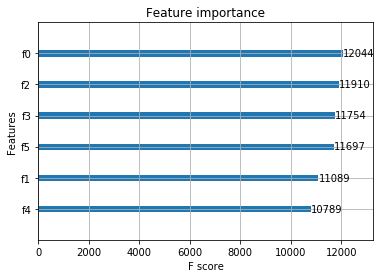

In [38]:
plot_importance(clf)
plt.show()

In [39]:
preds = [encoder.inverse_transform(pred) for pred in predictions]

In [40]:
preds[:10]

['Sony-NEX-7',
 'iPhone-6',
 'Sony-NEX-7',
 'HTC-1-M7',
 'HTC-1-M7',
 'iPhone-4s',
 'Sony-NEX-7',
 'Sony-NEX-7',
 'LG-Nexus-5x',
 'Sony-NEX-7']

In [41]:
subm = pd.read_csv('../submissions/sample_submission.csv', index_col='fname')
subm.head()

,camera
fname,
img_0002a04_manip.tif,iPhone-6
img_001e31c_unalt.tif,iPhone-6
img_00275cf_manip.tif,iPhone-6
img_0034113_unalt.tif,iPhone-6
img_00344b7_unalt.tif,iPhone-6


In [42]:
subm['camera'] = preds
subm.head()

,camera
fname,
img_0002a04_manip.tif,Sony-NEX-7
img_001e31c_unalt.tif,iPhone-6
img_00275cf_manip.tif,Sony-NEX-7
img_0034113_unalt.tif,HTC-1-M7
img_00344b7_unalt.tif,HTC-1-M7


In [43]:
subm.to_csv('../submissions/xgboost-3.csv')

In [44]:
pwd

'/home/abanihi/devel/myprojects/Kaggle-Quest/Competitions/IEEE-Camera-Model-Identification/notebooks'